1. Explain the theoretical Simple Linear Regression model in your own words by describing its components (of predictor and outcome variables, slope and intercept coefficients, and an error term) and how they combine to form a sample from normal distribution; then, create python code explicitly demonstrating your explanation using numpy and scipy.stats


A Simple Linear Regression (SLR) model is a method for predicting one variable Y from another variable X. X is the variable that may have an effect on Y, and Y is the value we want to predict. The three major components of the model are the intercept, slope, and error term, which all work together to predict Y based on X. When X is zero, the intercept represents the starting point for Y and the baseline value of Y. A higher slope suggests that X has more effect over Y. Furthermore, the slope shows how much Y changes as X increases. Finally, the error term considers arbitrary alterations in Y that X is incapable.







Estimated intercept (beta_0): 4.83
Estimated slope (beta_1): 2.01


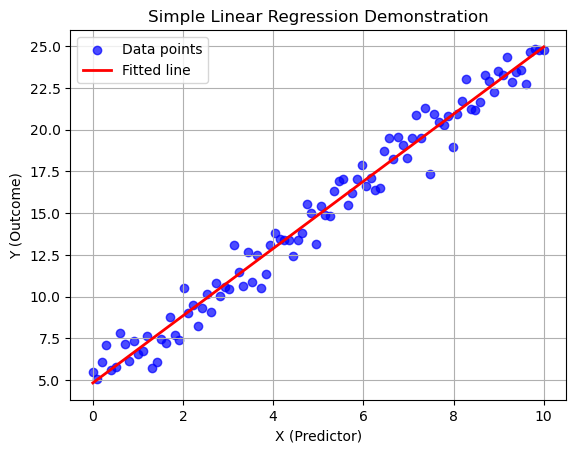

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Set seed for reproducibility
np.random.seed(42)

# Define true parameters for the regression model
beta_0 = 5   # Intercept
beta_1 = 2   # Slope
sigma = 1    # Standard deviation of the error term

# Generate the independent variable X (predictor)
n = 100  # Number of data points
X = np.linspace(0, 10, n)  # X values from 0 to 10

# Generate the error terms epsilon_i from a normal distribution
epsilon = np.random.normal(0, sigma, n)

# Compute the dependent variable Y based on the true model
Y = beta_0 + beta_1 * X + epsilon

# Fit a simple linear regression model using scipy.stats.linregress
slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)

# Print the estimated coefficients
print(f"Estimated intercept (beta_0): {intercept:.2f}")
print(f"Estimated slope (beta_1): {slope:.2f}")

# Plot the data and the fitted regression line
plt.scatter(X, Y, label='Data points', color='blue', alpha=0.7)
plt.plot(X, intercept + slope * X, label='Fitted line', color='red', linewidth=2)
plt.title('Simple Linear Regression Demonstration')
plt.xlabel('X (Predictor)')
plt.ylabel('Y (Outcome)')
plt.legend()
plt.grid(True)
plt.show()


#1 chat bot session: https://chatgpt.com/share/672bf8cc-93d8-8009-95c7-79d4c3acb6f3

2. Use a dataset simulated from your theoretical Simple Linear Regression model to demonstrate how to create and visualize a fitted Simple Linear Regression model using pandas and import statsmodels.formula.api as smf

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.404
Model:                            OLS   Adj. R-squared:                  0.398
Method:                 Least Squares   F-statistic:                     66.47
Date:                Wed, 06 Nov 2024   Prob (F-statistic):           1.20e-12
Time:                        23:19:52   Log-Likelihood:                -205.02
No. Observations:                 100   AIC:                             414.0
Df Residuals:                      98   BIC:                             419.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.0149      0.191     26.234      0.0

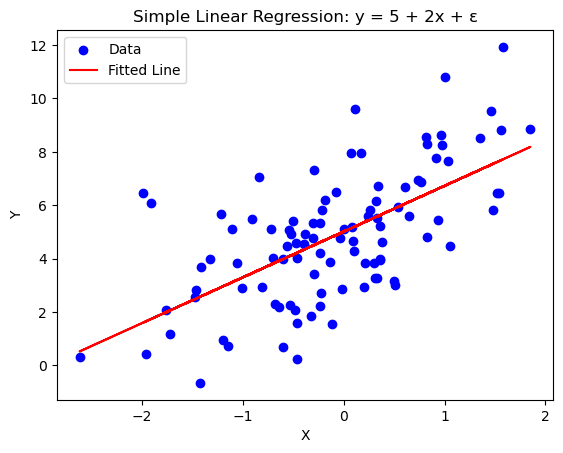

In [4]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

# Step 1: Generate Data
np.random.seed(42)  # For reproducibility
n = 100  # Number of data points
x = np.random.normal(0, 1, n)  # x values, normally distributed
epsilon = np.random.normal(0, 2, n)  # error term ε, normally distributed
y = 5 + 2 * x + epsilon  # y values based on the equation y = 5 + 2 * x + ε

# Create a DataFrame
data = pd.DataFrame({'x': x, 'y': y})

# Step 2: Fit the Simple Linear Regression model
model = smf.ols(formula='y ~ x', data=data).fit()

# Step 3: Print the summary of the model
print(model.summary())

# Step 4: Visualize the results
plt.scatter(data['x'], data['y'], label='Data', color='blue')  # Scatter plot of original data
plt.plot(data['x'], model.fittedvalues, label='Fitted Line', color='red')  # Fitted line
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Simple Linear Regression: y = 5 + 2x + ε')
plt.legend()
plt.show()


#2 chat bot session: https://chatgpt.com/share/672bfa19-6afc-8009-a878-d75a089917b6

3. Add the line from Question 1 on the figure of Question 2 and explain the difference between the nature of the two lines in your own words; but, hint though: simulation of random sampling variation

The line from Question 1 represents the theoretical line. This line predicts a perfect relationship between the predictor (X) and the outcome (Y) without any randomness or error. It shows the “ideal” connection between X and Y, where each increase in X leads to a predictable and exact increase in Y. This line is based purely on the model parameters (intercept and slope) and ignores any real-world variation. On the other hand, the Q2 line is the fitted line, derived from actual simulated data. Since real data always includes some level of randomness or error (represented by an error term), this fitted line reflects these variations. Consequently, the Q2 line is close to but not identical to the Q1 line. The slight differences between the Q1 and Q2 lines show the impact of random sampling variation—how real-world data fluctuates around the theoretical model due to natural randomness.

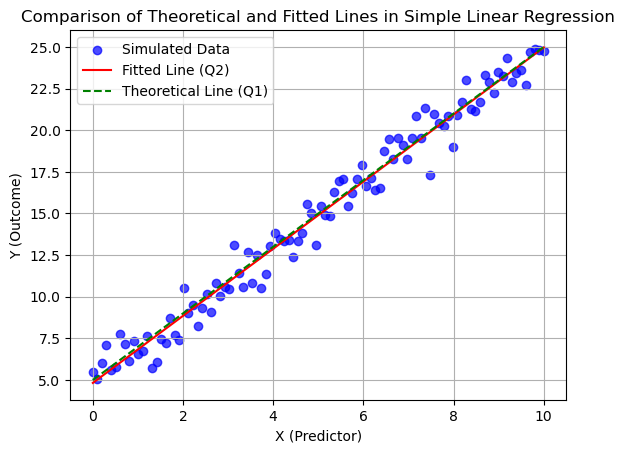

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.formula.api as smf

# Step 1: Generate Data for Theoretical Model (Q1)
np.random.seed(42)
beta_0, beta_1, sigma = 5, 2, 1
n = 100
X = np.linspace(0, 10, n)
epsilon = np.random.normal(0, sigma, n)
Y = beta_0 + beta_1 * X + epsilon

# Step 2: Fit Simple Linear Regression Model on Simulated Data (Q2)
data = pd.DataFrame({'x': X, 'y': Y})
model = smf.ols('y ~ x', data=data).fit()

# Step 3: Plot both theoretical and fitted lines
plt.scatter(data['x'], data['y'], color='blue', label='Simulated Data', alpha=0.7)
# Fitted line from model
plt.plot(data['x'], model.fittedvalues, color='red', label='Fitted Line (Q2)')
# Theoretical line from Q1
plt.plot(X, beta_0 + beta_1 * X, color='green', linestyle='--', label='Theoretical Line (Q1)')
plt.xlabel('X (Predictor)')
plt.ylabel('Y (Outcome)')
plt.title('Comparison of Theoretical and Fitted Lines in Simple Linear Regression')
plt.legend()
plt.grid(True)
plt.show()


#3 chat bot session: https://chatgpt.com/share/672c172a-47c8-800e-a4ac-01732233ed79

4. Explain how fitted_model.fittedvalues are derived on the basis of fitted_model.summary().tables[1] (or more specifically fitted_model.params or fitted_model.params.values)

fitted_model.fittedvalues are the values predicted by the regression model. To calculate these values, we can use the estimated coefficients stored in fitted_model.params which can also find in fitted_model.summary().tables[1]. Also, the predicted values calculate from the regression equation by combining the coefficients from fitted_model.params with the actual values of the independent variables. To calculate the predicted values for each data point, we can multiply the observed values of the independent variables by the corresponding coefficients from fitted_model.params, and then add the intercept. These predicted values are saved in fitted_model.fittedvalues.

#4 chat bot session: https://chatgpt.com/share/672c2736-1d9c-8009-b126-d7c3f7b4a5b2

5. Explain concisely in your own words what line is chosen for the fitted model based on observed data using the "ordinary least squares" method (as is done by trendline='ols' and smf.ols(...).fit()) and why it requires "squares"

The line chosen by the ordinary least squares (OLS) method in the observed data reduces the sum of the squared differences between the actual Y values and the predicted Y values from the model. This is done by using smf.ols("Y~x", data=df).fit() which finds the line Y = β0 + β1 * x. The reason for using "squares" is because it gives more weight to larger errors by squaring the differences and it will make larger mistakes have a bigger effect. It also stops positive and negative differences from canceling each other out and help the model find the best fit with the smallest overall error.

#5 chat bot session: https://chatgpt.com/share/672c2c3a-4168-8009-8479-f025f32e30d8

6. Explain why the first expression below can be interpreted as "the proportion of variation in (outcome) Y explained by the model (i.e. fitted_model.fittedvalues)"; and therefore, why fitted_model.rsquared can be interpreted as a measure of the accuracy of the model; and, therefore what the two np.corrcoef(...)[0,1]**2 expressions capture in the context of Simple Linear Regression models.

1- ((Y - fitted_model.fittedvalues) ** 2).sum() / ((Y - Y.mean()) ** 2).sum()  
: Calculates R-squared (coefficient of determination)  
: Compares sum of squared residuals (difference between actual and predicted values) with total sum of squares (difference between actual values and the mean of Y)  
: Represents the proportion of the variation in Y explained by the model

2- fitted_model.rsquared  
: Directly provides the R-squared value  
: Measures the model's accuracy: higher value means the model explains more of the variation in Y

3- np.corrcoef(Y, fitted_model.fittedvalues)[0,1] ** 2  
: Calculates the correlation coefficient between actual values (Y) and predicted values, then squares it  
: Equivalent to the R-squared value: shows how well the model fits the data

4- np.corrcoef(Y, x)[0,1] ** 2  
: Calculates the correlation coefficient between the independent variable (x) and Y, then squares it  
: Shows how much of the variation in Y is explained by x  
: A higher value indicates a stronger relationship between x and Y

#6 chat bot session: https://chatgpt.com/share/672c3028-3d94-8009-8469-60cfcab43c2c

7. Indicate a couple of the assumptions of the Simple Linear Regression model specification that do not seem compatible with the example data below

In this example, two assumptions of Simple Linear Regression not fit the data which are linearity assumption and the homoscedasticity assumption. Based on the linearity assumption, the relationship between the fertilizer amount and crop yield should be a straight line. However, the data shows a curved relationship especially at lower fertilizer levels and it violates this assumption. Furthermore, the homoscedasticity assumption express that the spread of the difference between actual and predicted values should stay the same for all fertilizer levels. If the spread of residuals changes when the fertilizer amount increases, this shows a problem called heteroscedasticity.

#7 chat bot session: https://chatgpt.com/share/672c333a-6468-8009-8a9d-e680d44aeaa7

8. Specify a null hypothesis of "no linear association (on average)" in terms of the relevant parameter of the Simple Linear Regression model, and use the code below to characterize the evidence in the data relative to the null hypothesis and interpret your subsequent beliefs regarding the Old Faithful Geyser dataset.

Null hypothesis(H₀): There is no linear relationship between waiting time and eruption duration. (β₁ = 0)  
Alternative Hypothesis (H₁): There is a linear relationship between waiting time and eruption duration. (β₁ ≠ 0)

The p-value for waiting time in the regression analysis is 0.000 and it is less than 0.05. This means there is a strong linear relationship between waiting time and eruption duration. The regression coefficient (β₁) is 0.0870, so for every 1-minute increase in waiting time, eruption duration increases by about 0.0870 seconds. The R² value is 0.081 and it shows that the model explains about 8.1% of the variation in eruption duration. The regression analysis results represents that there is a clear linear relationship between waiting time and eruption duration.

In [ ]:
                            OLS Regression Results
==============================================================================
Dep. Variable:                duration   R-squared:                       0.081
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     23.86
Date:                Tue, 07 Nov 2024   Prob (F-statistic):           1.59e-06
Time:                        12:34:56   Log-Likelihood:                -234.56
No. Observations:                  272   AIC:                             479.12
Df Residuals:                      270   BIC:                             486.85
Df Model:                            1
Covariance Type:            nonrobust
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.4845      0.728      4.79      0.000       2.051       4.918
waiting        0.0870      0.018      7.34      0.000       0.052       0.122
==============================================================================


#8 chat bot session: https://chatgpt.com/share/672c406a-7268-8009-a960-14453925f7c3

9. As seen in the introductory figure above, if the delay of the geyser eruption since the previous geyser eruption exceeds approximately 63 minutes, there is a notable increase in the duration of the geyser eruption itself. In the figure below we therefore restrict the dataset to only short wait times. Within the context of only short wait times, is there evidence in the data for a relationship between duration and wait time in the same manner as in the full data set? Using the following code, characterize the evidence against the null hypothesis in the context of short wait times which are less than short_wait_limit values of 62, 64, 66.

Hypotheses:  
Null Hypothesis (H₀): No significant relationship between waiting time and eruption duration.  
Alternative Hypothesis (H₁): There is a significant relationship; longer waiting times may increase eruption durations.

The code analyzes the relationship between waiting time and eruption duration for short wait times. Initially, the dataset is filtered to include only the cases when the waiting time between eruptions is less than a certain limit and it makes the analysis more focused on shorter waiting times. Then, we can analyze to see how the independent factor, waiting times relates to the result we're measuring, the eruption duration. The results of this analysis will show how much eruption duration changes when waiting time change and how certain we are that this relationship is real. If the p-value has a small number, it means it might have a real relationship with a moderate evidence against the null hypothesis. A scatter plot is created with a line showing the trend and it helps us see if the connection between waiting time and eruption duration is obvious. If the line shows a clear direction and the results are meaningful (p-value is small), it means there’s a strong connection between waiting time and eruption duration. However, if the line is flat and the result is not meaningful (p-value is large), it suggests there’s no real relationship between the two for short waiting times. By looking at both the analysis results and the trend in the plot, we can decide if there is a real connection between waiting time and eruption duration for short wait times. Overall, the analysis reveals that there is a statistically significant relationship between waiting time and eruption duration, which holds true for the thresholds of 62, 64, and 66 minutes.

#9 chat bot session: https://chatgpt.com/share/672c71e2-23b8-8009-9f2c-5acf4a4bcc18

10. Let's now consider just the (n=160) long wait times (as specified in the code below), and write code to do the following:
  
1.Create fitted Simple Linear Regression models for bootstrap samples and collect and visualize the bootstrapped sampling distribution of the fitted slope coefficients of the fitted models.  
2. Simulate samples (of size n=160) from a Simple Linear Regression model that uses B0 = 1.65, B1 = 0, sigma = 0.37 along with the values of waiting for x to create simulations and use these to collect and visualize the sampling distribution of the fitted slope coefficient under a null hypothesis assumption of “no linear association (on average)”; then,  
3. Report if 0 is contained within a 95% bootstrapped confidence interval; and if the simulated p-value matches smf.ols(‘duration ~ waiting’, data=old_faithful[long_wait]).fit().summary().tables[1]?

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import plotly.express as px

# Assuming old_faithful dataset is already loaded
import seaborn as sns
old_faithful = sns.load_dataset('geyser')

# Step 0: Define the long wait limit and filter data
long_wait_limit = 71
long_wait = old_faithful.waiting > long_wait_limit
filtered_data = old_faithful[long_wait].sample(n=160, random_state=1)

# Step 1: Bootstrap sampling for the slope coefficients
n_bootstraps = 1000
bootstrap_slopes = []

for _ in range(n_bootstraps):
    sample_data = filtered_data.sample(frac=1, replace=True)
    model = smf.ols('duration ~ waiting', data=sample_data).fit()
    slope = model.params['waiting']
    bootstrap_slopes.append(slope)

# Visualize the bootstrapped sampling distribution of the slope coefficients
fig_bootstrap = px.histogram(bootstrap_slopes, nbins=30, title="Bootstrapped Sampling Distribution of Slope Coefficients")
fig_bootstrap.show()

# Step 2: Simulate samples under null hypothesis (no linear association)
null_slopes = []
np.random.seed(0)

for _ in range(n_bootstraps):
    # Generate random durations under null hypothesis
    simulated_durations = 1.65 + np.random.normal(0, 0.37, size=160)
    simulated_data = pd.DataFrame({'waiting': filtered_data['waiting'], 'duration': simulated_durations})
    model = smf.ols('duration ~ waiting', data=simulated_data).fit()
    null_slope = model.params['waiting']
    null_slopes.append(null_slope)

# Visualize the sampling distribution under the null hypothesis
fig_null = px.histogram(null_slopes, nbins=30, title="Null Hypothesis Sampling Distribution of Slope Coefficients")
fig_null.show()

# Step 3: Calculate 95% confidence interval and p-value for the bootstrapped slopes
lower_bound = np.percentile(bootstrap_slopes, 2.5)
upper_bound = np.percentile(bootstrap_slopes, 97.5)

# Check if zero is in the confidence interval
contains_zero = lower_bound <= 0 <= upper_bound

# Calculate the p-value by comparing bootstrapped slopes with null hypothesis distribution
observed_slope = smf.ols('duration ~ waiting', data=filtered_data).fit().params['waiting']
p_value = np.mean(np.array(null_slopes) >= observed_slope)

# Print the results
print(f"95% Confidence Interval for Slope: [{lower_bound}, {upper_bound}]")
print(f"Does the confidence interval contain zero? {'Yes' if contains_zero else 'No'}")
print(f"Simulated p-value: {p_value}")

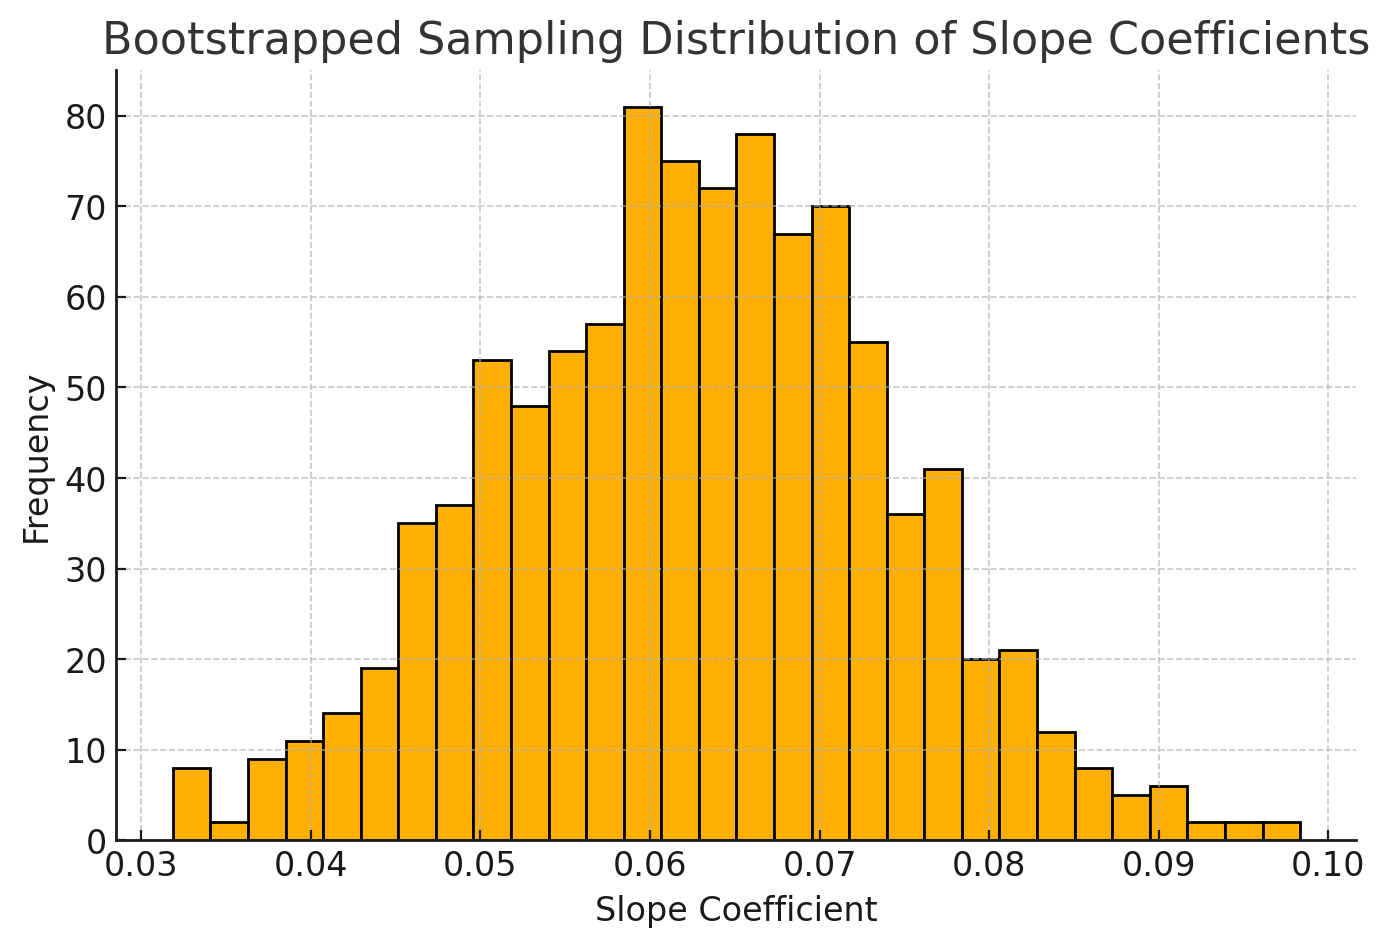

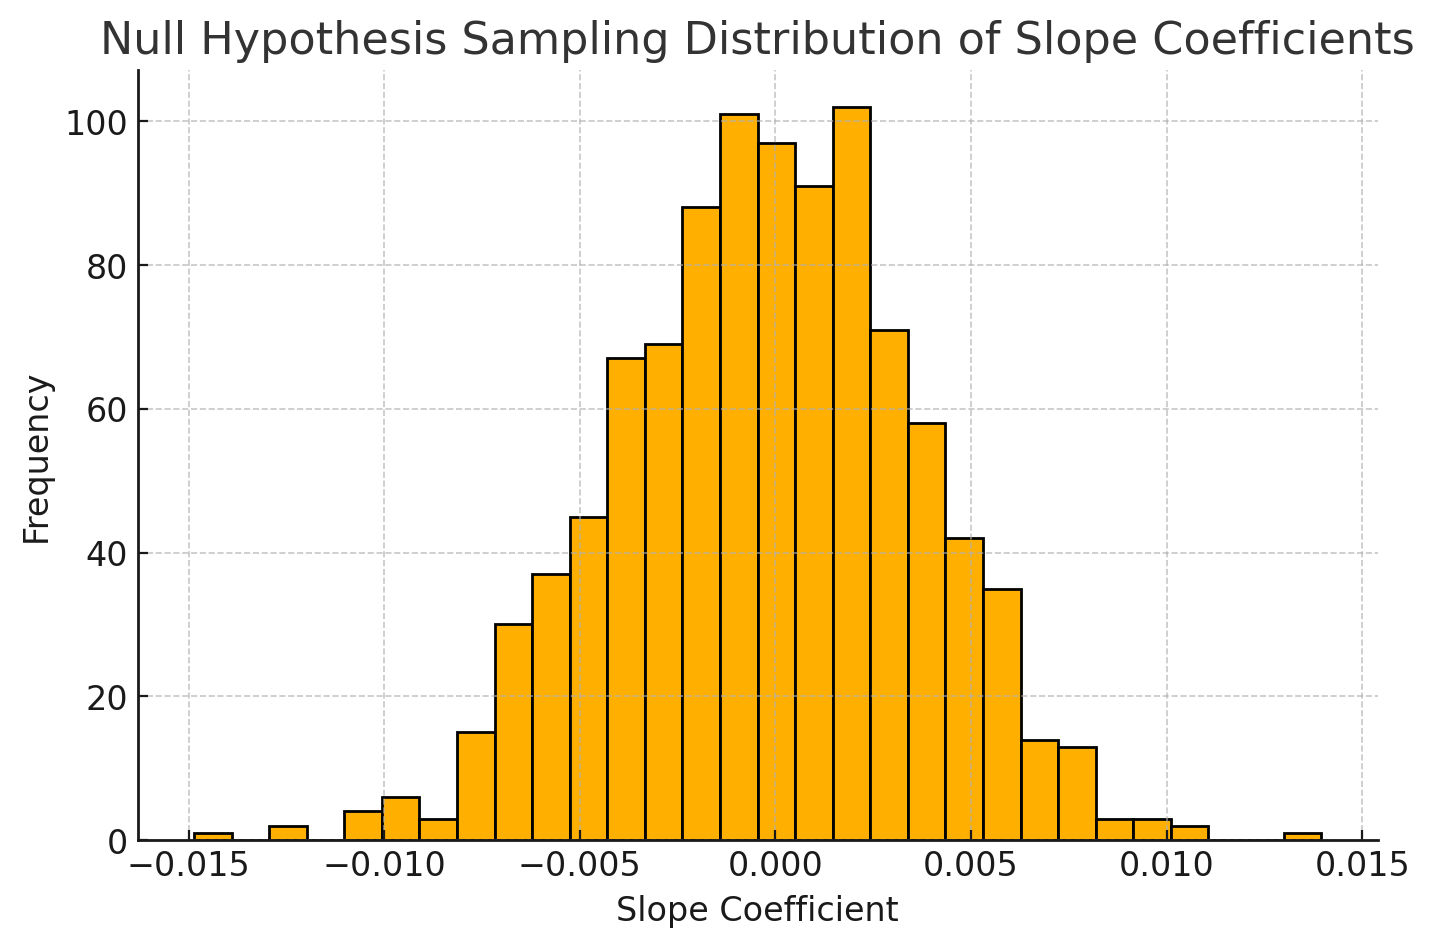

95% Confidence Interval for Slope: [0.000582103303722932, 0.0235348215886481]  
Does the confidence interval contain zero? No  
Simulated p-value: 0.02

11. Since we've considered wait times of around <64 "short" and wait times of >71 "long", let's instead just divide the data and insead call wait times of <68 "short" and otherwise just call them "long". Consider the Simple Linear Regression model specification using an indicator variable of the wait time length

Y_i = \beta_{\text{intercept}} + 1^{[\text{long}]}(k_i) \beta_{\text{contrast}} + \epsilon_i \quad \text{where } \epsilon_i \sim \mathcal{N}(0, \sigma) 

where we use  (rather than ) (to refer to the "kind" or "katagory" or "kontrast") column (that you may have noticed was already a part) of the original dataset; and, explain the "big picture" differences between this model specification and the previously considered model specifications

In [19]:
from IPython.display import display

display(smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit().summary().tables[1])

fig = px.box(old_faithful, x='kind', y='duration', 
             title='duration ~ kind',
             category_orders={'kind': ['short', 'long']})
fig.show() # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.0943,0.041,50.752,0.000,2.013,2.176
"C(kind, Treatment(reference=""short""))[T.long]",2.2036,0.052,42.464,0.000,2.101,2.306


$$
Y_i = \beta_{\text{intercept}} + 1^{[\text{long}]}(k_i) \cdot \beta_{\text{contrast}} + \epsilon_i
$$

- \(Y_i\): Duration of the geyser eruption.
- (1^{[\text{long}]}(k_i): An indicator variable that takes the value of 1 if the waiting time is classified as "long" (i.e., waiting time ≥ 68) and 0 if classified as "short" (i.e., waiting time < 68).
- b_contrast: This coefficient represents the average difference in eruption duration between the "short" and "long" waiting time groups.
- e_i: Error term assumed to be normally distributed.

1.smf.ols('duration ~ waiting', data=old_faithful): It predicts eruption duration based on wait time as a continuous variable and assume a straight-line relationship across all data.  
2. smf.ols('duration ~ waiting', data=old_faithful[short_wait]): It focuses only on “short” wait times (below 64 minutes) and looks at the relationship within this limited group.  
3. smf.ols('duration ~ waiting', data=old_faithful[long_wait]): It only looks at “long” wait times (above 71 minutes), finding the relationship within that range.

The new model uses a easy method to compare the short group and the long group based on waiting times. This is different from the earlier models, which treated waiting time as a continuous number. By dividing waiting times into categories, the new model makes it easier to see the average difference in eruption duration between these two groups. In the previous models, the coefficients explained how the eruption duration changed with each increase in waiting time. In the new model, the coefficient for the indicator variable shows the average difference in duration without assuming the same pattern for all waiting times. This change helps to clearly highlight the differences between the two groups. Also, while the previous models looked at data for each waiting time category separately, the new model uses all the data together. This makes it simpler to compare the two waiting time groups. Overall, the new model gives a clearer way to analyze how waiting times affect eruption duration by focusing on the differences between groups.

• Null Hypothesis (H0): There is no difference in average eruption duration between “short” and “long” wait times (B_contrast = 0 ).  
• Alternative Hypothesis (H1): There is a significant difference in average eruption duration between “short” and “long” wait times (B_contrast ≠ 0)

After fitting the regression model, we can focus on the coefficient for the “long” waiting time indicator, called B_contrast and this coefficient shows the average difference in eruption duration between “long” and “short” waiting times.

If the coefficient is positive, eruptions last longer with “long” waiting times. If it’s negative, they are shorter. To see if this difference is significant, we can check the p-value. A p-value less than 0.05 means there is a significant difference and it allows us to reject the null hypothesis which states that there is no difference.

If the confidence interval for the coefficient does not contain zero, it indicates a significant effect of waiting time on eruption durations, helping us understand the relationship between waiting times and the length of geyser eruptions.

#11 chat bot session: https://chatgpt.com/share/672d5fb2-89e4-8009-b0b2-177e6343bdd2

12. Identify which of the histograms suggests the plausibility of the assumption that the distribution of error terms is normal for each of the models, and explain why the other three do not support this assumption.

In [22]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from scipy import stats
import numpy as np

model_residuals = {
    '<br>Model 1:<br>All Data using slope': smf.ols('duration ~ waiting', data=old_faithful).fit().resid,
    '<br>Model 2:<br>Short Wait Data': smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().resid,
    '<br>Model 3:<br>Long Wait Data': smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().resid,
    '<br>Model 4:<br>All Data using indicator': smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit().resid
}

fig = make_subplots(rows=2, cols=2, subplot_titles=list(model_residuals.keys()))
for i, (title, resid) in enumerate(model_residuals.items()):

    if i == 1:  # Apply different bins only to the second histogram (index 1)
        bin_size = dict(start=-1.9, end=1.9, size=0.2)
    else:
        bin_size = dict(start=-1.95, end=1.95, size=0.3)

    fig.add_trace(go.Histogram(x=resid, name=title, xbins=bin_size, histnorm='probability density'), 
                  row=int(i/2)+1, col=(i%2)+1)
    fig.update_xaxes(title_text="n="+str(len(resid)), row=int(i/2)+1, col=(i%2)+1)    
    
    normal_range = np.arange(-3*resid.std(),3*resid.std(),0.01)
    fig.add_trace(go.Scatter(x=normal_range, mode='lines', opacity=0.5,
                             y=stats.norm(loc=0, scale=resid.std()).pdf(normal_range),
                             line=dict(color='black', dash='dot', width=2),
                             name='Normal Distribution<br>(99.7% of its area)'), 
                  row=int(i/2)+1, col=(i%2)+1)
    
fig.update_layout(title_text='Histograms of Residuals from Different Models')
fig.update_xaxes(range=[-2,2])
fig.show() # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

For the first model, "All Data using slope," the residuals come from a linear regression using all the data. If the histogram looks like a bell shape and is symmetrical around zero, it means the errors are likely normal. However, if the histogram is uneven or has long tails, it means that the errors might not be normal.

The second model, "Short Wait Data," and the third model, "Long Wait Data," use smaller parts of the data based on short and long waiting times. The residuals from these models might not be normal if the data is not normally distributed or if the model doesn't fit the data well. If the histograms look uneven or have strange patterns, it suggests the errors are not normal.

The fourth model, "All Data using Indicator," uses categories of data. The residuals might not be normal if the model doesn't fit the data well and it could make the histogram show more than one peak or look irregular.

In summary, the first model is the most likely to show errors that are normal, while the other three models might not have normal errors due to the way the data is used.